## **Mô tả bài toán**
Để hiểu diễn biến covid 19 tại các quốc gia, WHO tiến hành thống kê số lượng ca bệnh tại từng quốc gia theo ngày.
Các thông tin được ghi nhận bao gồm, bộ dữ liệu chứa thông tin thống kê của ngày 12-4-2020 với các thông tin như sau:

- country: Quốc gia 
- continent: Châu lục
- date: ngày ghi nhận
- cases: Số lượng ca mắc trong ngày
- deaths: số lượng ca tư vong tính tới thời điểm thống kê
- country_code: Mã quộc gia
- population: Dân số

Bạn hãy thực hiện các công việc sau:
- Đọc dữ liệu từ file subset-covid-data.csv
- Tìm hiểu cấu trúc bộ dữ liệu: Số lượng quan sát, số thuộc tính trong bộ dữ liệu, thang đo tương ứng của các thuộc tính<br>
Hãy giải đáp các thắc mắc sau:
- Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020 giống nhau hay không
- Tổng số lượng người mắc bệnh của từng châu lục
- Top 5 quốc gia có số lượng ca mắc mới lớn nhất
- Tổng số lượng ca tử vong của từng châu lục
- Top 5 quốc gia có số lượng ca tử vong lớn nhất

In [3]:
'''1. Đọc bộ dữ liệu'''
# sử dụng thư viện pandas để làm việc với dữ liệu dạng bảng
import pandas as pd

In [4]:
data=pd.read_csv('subset-covid-data.csv')
data.tail()

,country,continent,date,day,month,year,cases,deaths,country_code,population
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0
205,Zimbabwe,Africa,2020-04-12,12,4,2020,3,0,ZWE,14439018.0


In [5]:
# đọc dữ liệu, file dữ liệu thường có encoding = 'UTF-8' hoặc 'ISO-8859-1'
data=pd.read_csv('subset-covid-data.csv', encoding= 'UTF-8')

In [10]:
# hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [11]:
'''2: Tìm hiểu cấu trúc bộ dữ liệu'''
# Số lượng dòng và cột của bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


- Bộ dữ liệu chứa 206 dòng, 10 cột

Nhận diện thang đo cho từng biến quan sát

- country, continent, country_code: có kiểu object –> norminal attribute
- date: object: –> norminal 
- day, month, year: là dữ liệu dạng số nguyên (int64) mô tả ngày, tháng, năm quan sát, những thuộc tính - này chỉ dùng để định danh, phân biệt giữa ngày, tháng, năm khác nhau –> norminal 
- Cases, deadths, population: mô tả thông tin đếm được, có số ‘0’ tuyệt đối –> ratio

In [6]:
'''3: Giải đáp thắc mắc'''
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

–> ngày 12/04/2020 có 204 quan sát, 11/04 và ngày 18/1 có 1 quan sát và đây là dữ liệu nhiễu cần tiến hành loại bỏ.

In [7]:
'''3.1 Liệu các quốc gia có sô lượng ca mắc mới trong ngày 12-4-2020, số ca tử vong trong ngày 12-4 có giống nhau hay không?'''
# lọc dữ liệu nhiễu:
cleaned_data = data[data.date == '2020-04-12']
cleaned_data

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [18]:
# Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia
print ("trung bình số ca mắc mới: " + str(cleaned_data.cases.mean()))
print ("trung vị của số ca mắc mới: "+ str(cleaned_data.cases.median()))

trung bình số ca mắc mới: 376.8186274509804
trung vị của số ca mắc mới: 11.5


In [31]:
cleaned_data.cases.values

array([   34,    17,    64,    21,     0,     0,     0,   162,    30,
           6,    51,   247,    67,     4,    42,    58,     1,   245,
        1351,     3,     0,     2,     0,    24,     0,    47,     0,
        1089,     0,     0,    26,    36,     2,     2,    17,  1168,
           1,     8,     0,     0,   426,    93,   236,     0,    19,
          53,    39,    56,     0,    21,   170,    11,   177,    37,
           0,   139,    96,   145,     0,     0,     0,    46,     2,
           4,     0,     0,     0,   136,  3114,     0,     3,     5,
           8,  2821,    30,     2,    70,     0,     0,     3,    16,
           9,    38,     3,     5,     2,     0,     1,   100,    14,
         909,   330,  1837,    39,   839,    25,   335,  4694,     4,
        1401,     0,     9,    40,     2,    33,   161,    38,     2,
          18,    10,    11,     1,     0,    54,    47,     0,     3,
         184,     0,    18,    13,     0,     1,   375,   122,     2,
           0,     6,

Text(0, 0.5, 'Số lượng quốc gia')

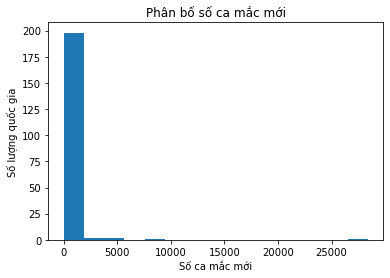

In [19]:
import matplotlib.pyplot as plt
plt.hist(cleaned_data.cases, bins = 15)
plt.title("Phân bố số ca mắc mới")
plt.xlabel("Số ca mắc mới")
plt.ylabel("Số lượng quốc gia")

- có 50% quốc gia có số ca mắc mới <=11 ca, và có 50% quốc gia có số ca mắc mới >12 ca, nhưng giá trị trung bình = 376 lớn hơn rất nhiều so với 11.5 nên có một vài quốc gia có số ca mắc mới vô lớn, khác biệt hoàn toàn với các quốc gia còn lại
- Nhìn vào biểu đồ phân bố: Hầu như tất cả các quốc gia (khoảng 160/206) có số lượng ca mắc mới rất nhỏ, còn lại một số quốc gia có số ca mắc mới lớn hơn hẳn, đặc biệt có quốc gia có số ca mắc mới > 25000

In [20]:
''' 3.2 Tổng số ca mắc mới, số ca tử vong ở từng châu lục '''
print("tổng số ca nhiễm và số ca tử vọng của các châu lục")
cleaned_data.groupby('continent')[['cases','deaths']].sum()

tổng số ca nhiễm và số ca tử vọng của các châu lục


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [21]:
cleaned_data.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [34]:
'''3.3 Top 5 quốc gia có số ca nhiễm mới cao nhất'''
print ("5 quốc gia có số ca nhiễm cao nhất")
data = data.sort_values('cases',ascending = False)
data[['country', 'cases']].head()

5 quốc gia có số ca nhiễm cao nhất


,country,cases
198,United_States_of_America,28391
195,United_Kingdom,8719
190,Turkey,5138
98,Italy,4694
177,Spain,4550


In [51]:
'''3.3 Top 5 quốc gia có số ca nhiễm mới cao nhất'''
print ("5 quốc gia có số ca nhiễm cao nhất")
top5_country_cases = data.groupby('country')['cases'].max().sort_values(ascending = False)
top5_country_cases.head()

5 quốc gia có số ca nhiễm cao nhất


country
United_States_of_America    28391
United_Kingdom               8719
Turkey                       5138
Italy                        4694
Spain                        4550
Name: cases, dtype: int64

In [47]:
print ("5 quốc gia có số ca nhiễm thấp nhất")
data = data.sort_values('cases')
data.head()

5 quốc gia có số ca nhiễm thấp nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
142,Northern_Mariana_Islands,Oceania,2020-04-12,12,4,2020,0,0,MNP,56882.0
119,Maldives,Asia,2020-04-12,12,4,2020,0,0,MDV,515696.0
122,Mauritania,Africa,2020-04-12,12,4,2020,0,0,MRT,4403319.0
127,Mongolia,Asia,2020-04-12,12,4,2020,0,0,MNG,3170208.0
129,Montserrat,America,2020-04-12,12,4,2020,0,0,MSR,5900.0


In [46]:
'''3.4 Top 5 quốc gia có số ca tử vong cao nhất'''
print ("5 quốc gia có số ca tử vong cao nhất")
data = data.sort_values('deaths',ascending = False)
data.head(5)

5 quốc gia có số ca tử vong cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [48]:
top5_country_deaths = cleaned_data.groupby('country')['deaths'].max().sort_values(ascending= False)
top5_country_deaths.head()

country
United_States_of_America    1831
United_Kingdom               839
France                       635
Italy                        619
Belgium                      327
Name: deaths, dtype: int64